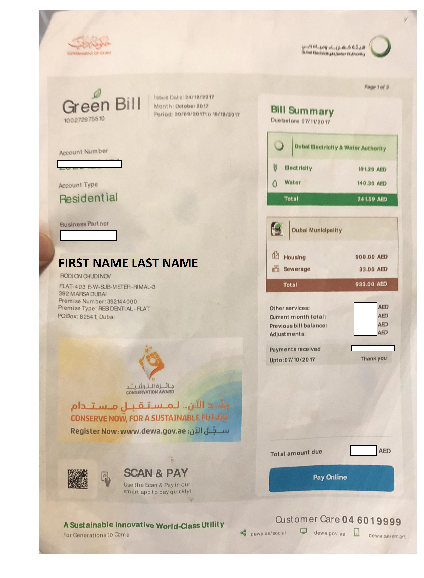

In [1]:
%matplotlib inline
import imageio
import matplotlib.pyplot as plt
import warnings
import matplotlib.cbook
warnings.filterwarnings("ignore",category=matplotlib.cbook.mplDeprecation)

pic = imageio.imread('query.JPEG')

plt.figure(figsize = (10,10))
plt.imshow(pic);
plt.axis('off');


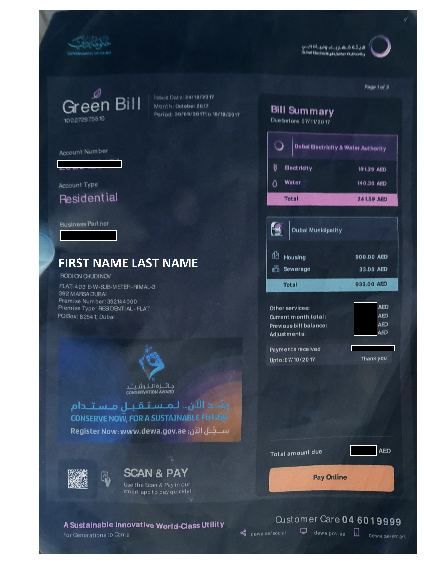

In [2]:
negative = 255 - pic # neg = (L-1) - img

plt.figure(figsize = (10,10))
plt.imshow(negative);
plt.axis('off');



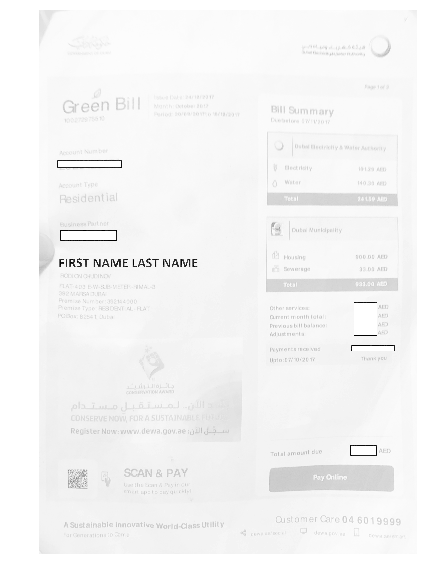

In [3]:
%matplotlib inline

import imageio
import numpy as np
import matplotlib.pyplot as plt

pic = imageio.imread('query.JPEG')
gray = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray = gray(pic)

'''
log transform
-> s = c*log(1+r)

So, we calculate constant c to estimate s
-> c = (L-1)/log(1+|I_max|)

'''

max_ = np.max(gray)

def log_transform():
    return (255/np.log(1+max_)) * np.log(1+gray)

plt.figure(figsize = (10,10))
plt.imshow(log_transform(), cmap = plt.get_cmap(name = 'gray'))
plt.axis('off');

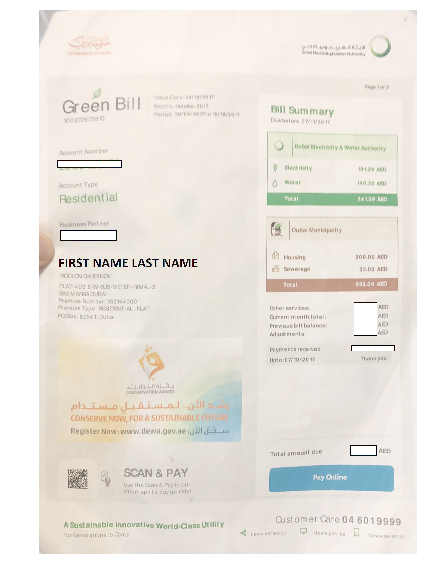

In [4]:
import imageio
import matplotlib.pyplot as plt

# Gamma encoding 
pic = imageio.imread('query.JPEG')
gamma = 2.2 # Gamma < 1 ~ Dark  ;  Gamma > 1 ~ Bright

gamma_correction = ((pic/255) ** (1/gamma)) 
plt.figure(figsize = (10,10))
plt.imshow(gamma_correction)
plt.axis('off');


CPU times: user 5min 53s, sys: 1.17 s, total: 5min 54s
Wall time: 5min 50s


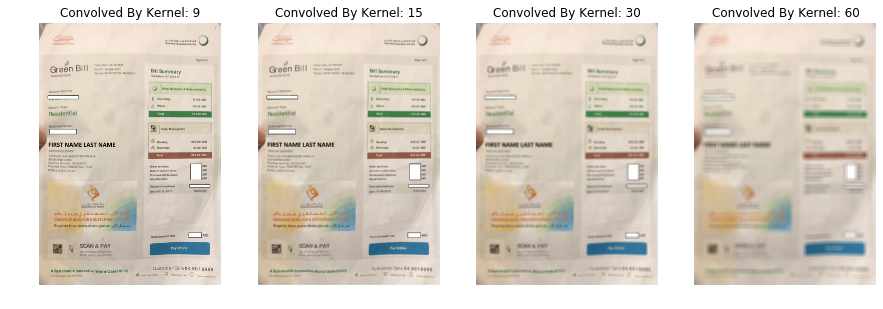

In [11]:
%%time
import numpy as np
import imageio
import matplotlib.pyplot as plt
from scipy.signal import convolve2d

def Convolution(image, kernel):
    conv_bucket = []
    for d in range(image.ndim):
        conv_channel = convolve2d(image[:,:,d], kernel, 
                               mode="same", boundary="symm")
        conv_bucket.append(conv_channel)
    return np.stack(conv_bucket, axis=2).astype("uint8")


kernel_sizes = [9,15,30,60]
fig, axs = plt.subplots(nrows = 1, ncols = len(kernel_sizes), figsize=(15,15));

pic = imageio.imread('query.JPEG')

for k, ax in zip(kernel_sizes, axs):
    kernel = np.ones((k,k))
    kernel /= np.sum(kernel)
    ax.imshow(Convolution(pic, kernel));
    ax.set_title("Convolved By Kernel: {}".format(k));
    ax.set_axis_off()

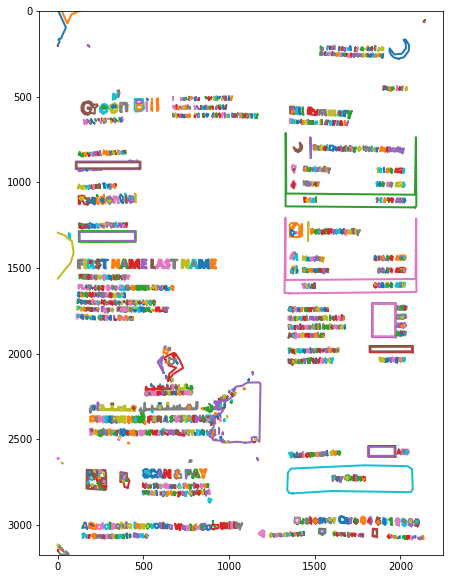

In [5]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from skimage import measure
import numpy as np
import imageio

pic = imageio.imread('query.JPEG')

h,w = pic.shape[:2]

im_small_long = pic.reshape((h * w, 3))
im_small_wide = im_small_long.reshape((h,w,3))

km = KMeans(n_clusters=2)
km.fit(im_small_long)

seg = np.asarray([(1 if i == 1 else 0)
                  for i in km.labels_]).reshape((h,w))

contours = measure.find_contours(seg, 0.5, fully_connected="high")
simplified_contours = [measure.approximate_polygon(c, tolerance=5) 
                       for c in contours]

plt.figure(figsize=(10,10))
for n, contour in enumerate(simplified_contours):
    plt.plot(contour[:, 1], contour[:, 0], linewidth=2)
    
    
plt.ylim(h,0)
plt.axes().set_aspect('equal')
